'''
 What is crossvalidation?
Crossvalidatio is a technique by which we evaluate the model performance.In this case we split dataset into
many subset for training and testing.
Types of cross validation:
1.Hold out cross validation
2.K-Fold cross validation
3.Leave one-out cross validation(LOOCV)
4.Stratified K Fold cross validation
                
                '''

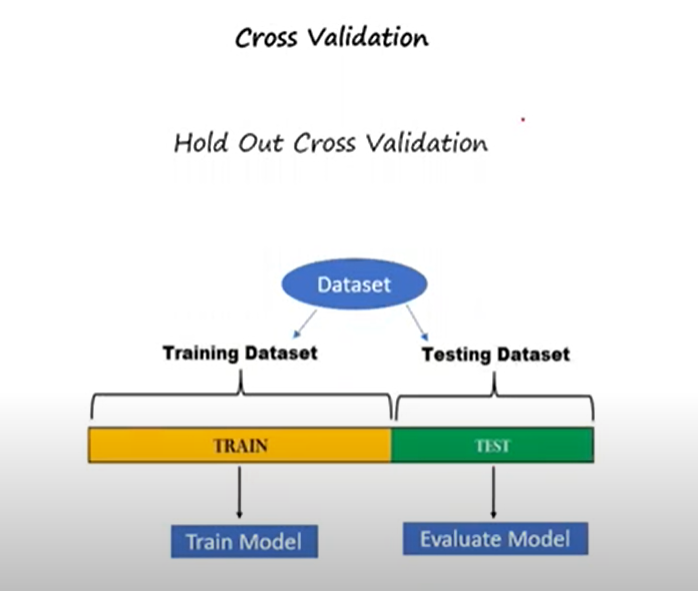

In [1]:
from IPython.display import Image
Image('E:\\Data Analysis\Data analysis 01.03.2022\Machine-Learning\Studymart\Machine Learning\Crosvalidation\Hold out.PNG')

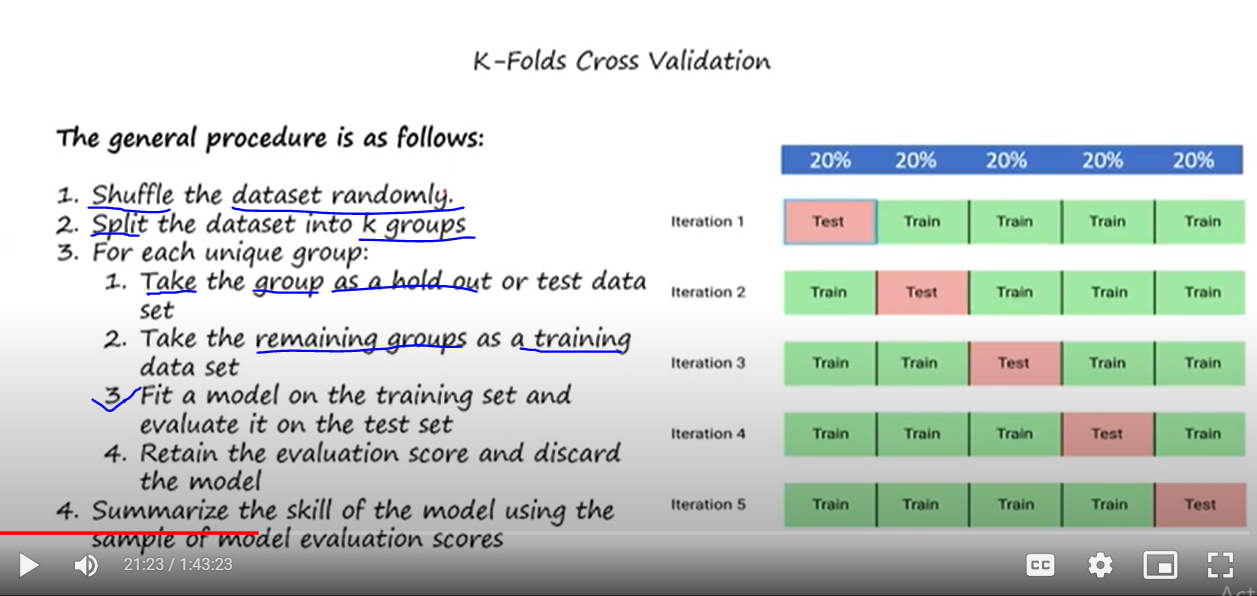

In [2]:
from IPython.display import Image
Image('E:\\Data Analysis\Data analysis 01.03.2022\Machine-Learning\Studymart\Machine Learning\Crosvalidation\K-Fold.PNG')

# What are the difference between K-Fold crossvalidation and Stratified K-Fold crossvalidation

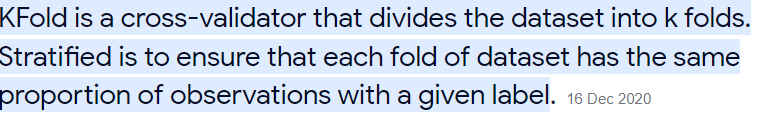

In [3]:
Image('E:\\Data Analysis\Data analysis 01.03.2022\Machine-Learning\Studymart\Machine Learning\Crosvalidation\Difference between k-Fold and stratified k-Fold.PNG')

# Leave one out cross validation (LOOCV) is a technique where sigle data point is kept for taesting and
rest of the data sets are kept for trainig, The concept figure is uploaded


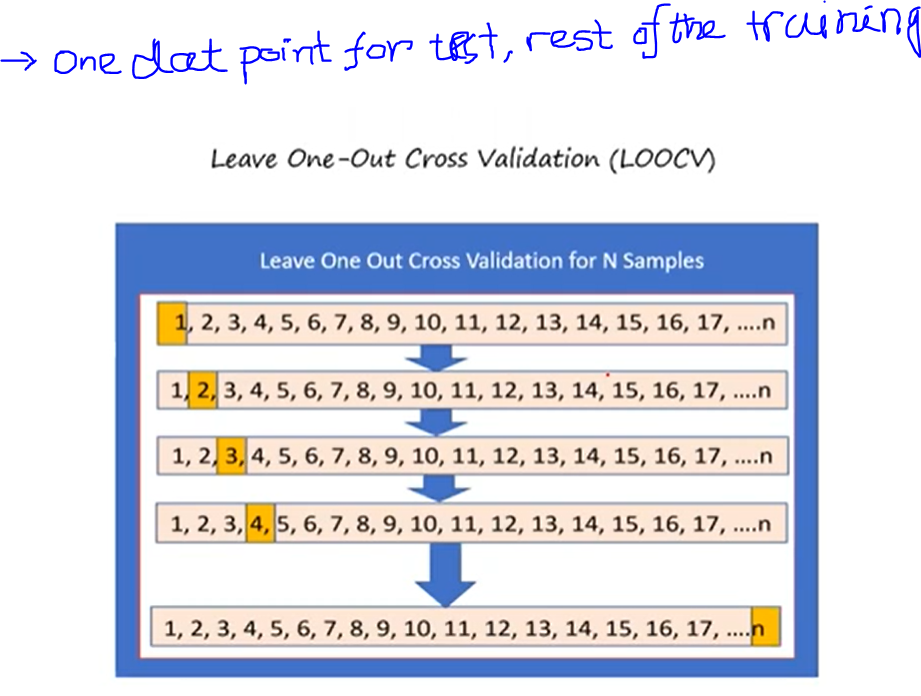

In [4]:
Image('E:\\Data Analysis\Data analysis 01.03.2022\Machine-Learning\Studymart\Machine Learning\Crosvalidation\LOOCV.PNG')

In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv(r'E:\\Data Analysis\Data analysis 01.03.2022\Machine-Learning\Studymart\Machine Learning\Crosvalidation\Customer-Churn-Prediction.csv')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()

In [9]:
#Checking rows and columns number of dataset 
df.shape

(7043, 21)

In [10]:
#Checking the is trhre null values in the Data set
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df['TotalCharges'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [13]:
#Since we have null value in TotalCharges, we can interpolate this column
new_df=df.interpolate()

In [14]:
new_df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [15]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
# Now we can counts the values of y_data
new_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [17]:
import seaborn as sns

C:\Users\Arif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

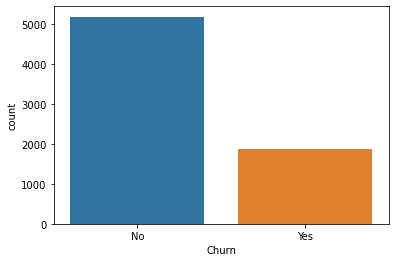

In [18]:
sns.countplot(df['Churn'])

In [19]:
new_df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016090,0.219856,0.101894
tenure,0.016090,1.000000,0.247890,0.824232
MonthlyCharges,0.219856,0.247890,1.000000,0.650307
TotalCharges,0.101894,0.824232,0.650307,1.000000


In [20]:
import matplotlib.pyplot as plt

<AxesSubplot:>

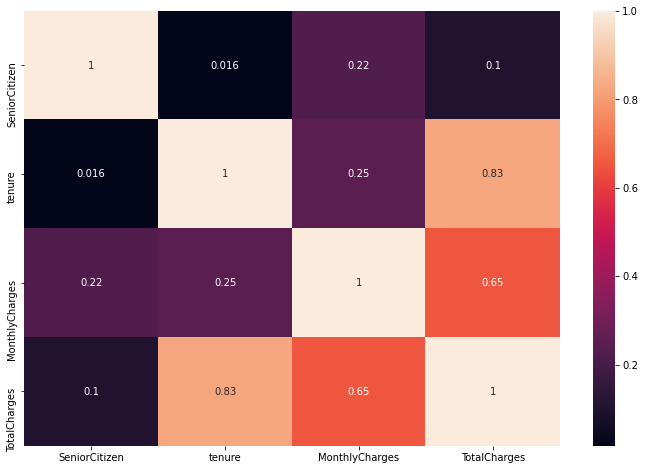

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

# Basic Vizualization by Seaborn

<AxesSubplot:xlabel='count', ylabel='gender'>

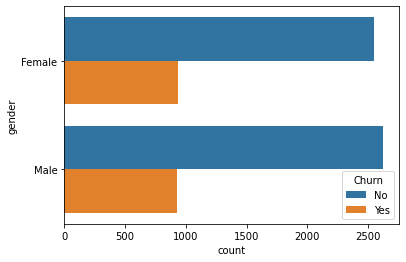

In [22]:
#How many females and males are showing Yes or No in Churn column
#The relation between gender coilumn and churn column
sns.countplot(y='gender',hue='Churn',data=new_df)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='count'>

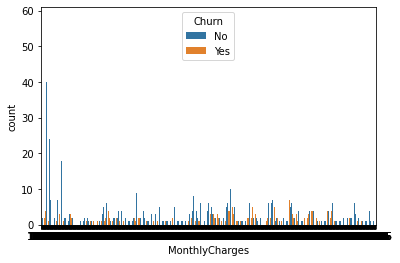

In [23]:
sns.countplot(x='MonthlyCharges',hue='Churn',data=new_df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

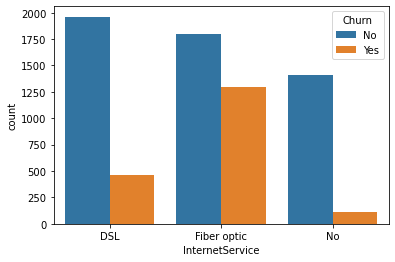

In [24]:
sns.countplot(x='InternetService',hue='Churn',data=new_df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

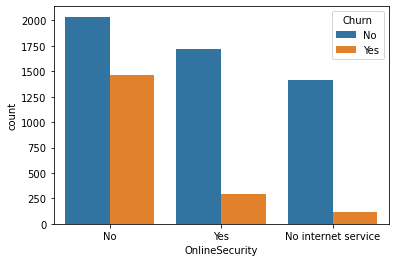

In [25]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=new_df)

In [26]:
new_df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

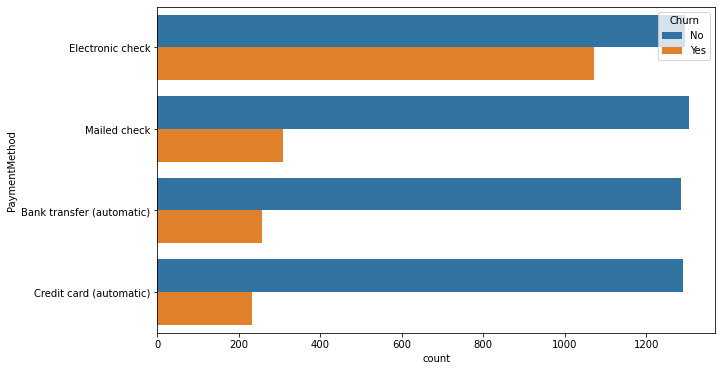

In [27]:
plt.subplots(figsize=(10,6))
sns.countplot(y='PaymentMethod',hue='Churn',data=new_df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

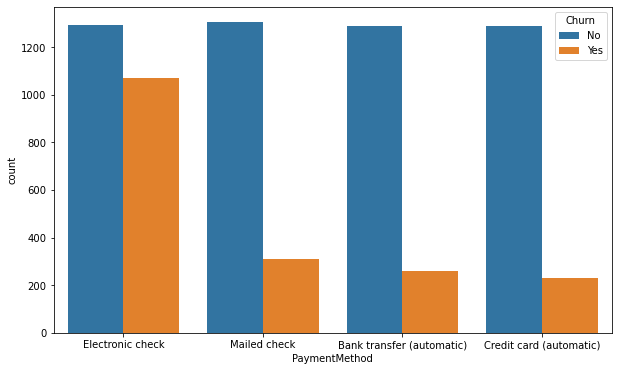

In [28]:
plt.subplots(figsize=(10,6))
sns.countplot(x='PaymentMethod',hue='Churn',data=new_df)

In [29]:
'''
Here, we can see that Electronic check is under danger, because the yes of churn is high.

            '''

'\nHere, we can see that Electronic check is under danger, because the yes of churn is high.\n\n            '

In [30]:
#Here coustomer ID is less important features, so we can remove it

new_df=new_df.drop('customerID',axis=1)

In [31]:
new_df.shape

(7043, 20)

In [32]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()

In [34]:
#We can check columns one more time
new_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
from pandas.api.types import is_numeric_dtype

In [36]:
for column in new_df.columns:
    if is_numeric_dtype(new_df[column]):
        continue
    else:
        new_df[column]=lbe.fit_transform(new_df[column])

In [37]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Now Separating data set

In [38]:
x=new_df.drop('Churn',axis=1)
y=new_df['Churn']

In [39]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [40]:
x.shape

(7043, 19)

In [41]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [42]:
y.shape

(7043,)

# Imbalanced data handling

In [43]:
new_df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [44]:
Not_Churned = (5174/(5174+1869)) * 100
Churned = (1869/(5174+1869)) * 100

In [45]:
print('Not churned {} percent people'.format(Not_Churned))
print('Churned {} percent people'.format(Churned))

Not churned 73.4630129206304 percent people
Churned 26.536987079369588 percent people


# Synthetic Minority oversampleing Technique(SMOTeTomek)

In [46]:
!pip install imblearn

In [47]:
from imblearn.combine import SMOTETomek

In [48]:
# Creating object
sm = SMOTETomek(random_state=42)

In [49]:
#value counting befrore
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [50]:
# Now we will do resamplimng
X,Y= sm.fit_resample(x,y)

In [51]:
#Value counts after re-sampleing
Y.value_counts()

1    4802
0    4802
Name: Churn, dtype: int64

In [52]:
X.shape

(9604, 19)

In [53]:
Y.shape

(9604,)

# Near Miss For Undersampling

In [54]:
from imblearn.under_sampling import NearMiss

In [55]:
nm = NearMiss()
new_x, new_y =nm.fit_resample(x,y)

In [56]:
new_y.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [57]:
'''
SMOTeTomek is for oversampling that means when we count values for y-column, we got number yes and number of no
which one is highest amking resampling near highest number is called oversampling and making resampling twoards
the lowest number is called undersampling

                    '''

'\nSMOTeTomek is for oversampling that means when we count values for y-column, we got number yes and number of no\nwhich one is highest amking resampling near highest number is called oversampling and making resampling twoards\nthe lowest number is called undersampling\n\n                    '

# Cross Validation

# Hold Out Cross Validation

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
xtrain,xtest,ytrain,ytest = train_test_split(new_x,new_y,train_size=.75,random_state=42 )

In [60]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1784,0,0,0,0,29,1,2,0,0,0,0,0,2,2,1,1,1,71.00,2080.10
611,1,1,0,0,4,0,1,0,0,2,0,0,2,2,0,1,1,50.95,207.35
1752,1,0,0,0,31,1,0,1,0,0,2,2,2,2,2,0,0,99.45,3109.90
3690,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,69.70,69.70
3422,0,0,0,0,53,1,2,1,2,0,2,0,2,2,1,1,1,106.95,5785.50


In [61]:
train,test = train_test_split(new_df,train_size=.80,random_state=42)

In [62]:
#we can save train data from out imported data set
train.to_csv('Total 80.csv')

In [63]:
#we are again importing training dataset which we have separated from previous data set
df_train = pd.read_csv('Total 80.csv')

In [64]:
rows, columns= new_df.shape
rows2, columns2 = df_train.shape


In [65]:
rows

7043

In [66]:
rows2

5634

In [67]:
train,test = train_test_split(new_df,train_size=.75,random_state=42)

In [68]:
train.to_csv('Train data75.csv')

In [69]:
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1151,0,0,0,0,59,1,2,1,2,2,2,0,0,2,0,1,0,99.45,5623.70
538,0,0,1,1,14,1,0,2,1,1,1,1,1,1,1,0,3,19.55,294.50
351,0,0,0,0,2,1,0,2,1,1,1,1,1,1,0,1,3,20.00,40.90
1108,1,1,1,0,34,1,0,1,0,0,2,0,2,0,0,1,1,85.20,2874.45
1662,1,0,0,0,17,1,0,2,1,1,1,1,1,1,1,0,3,19.95,310.60


In [70]:
xtest.shape

(935, 19)

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
clf= DecisionTreeClassifier()

In [73]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [74]:
clf.score(xtest,ytest)

0.6181818181818182

# Without Sampling

In [75]:
x.shape

(7043, 19)

In [76]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,train_size=.75,random_state=42)

In [77]:
clf.fit(xtrain1,ytrain1)

DecisionTreeClassifier()

In [78]:
clf.score(xtest1,ytest1)

0.7296990346394094

In [79]:
!pip install xgboost

In [80]:
import xgboost

In [81]:
from xgboost import XGBClassifier

In [82]:
xgb = XGBClassifier()

In [83]:
xgb.fit(xtrain,ytrain) # with resampling

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [84]:
xgb.score(xtest,ytest)

0.6631016042780749

In [85]:
xgb.fit(xtrain1,ytrain1) #Before resampling

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [87]:
xgb.score(xtest1,ytest1) # Before resampling, xGBoost score

0.7961385576377058

# K Fold Cross Validation

In [88]:
from sklearn.model_selection import KFold,cross_val_score,cross_validate

In [106]:
obj_Kfold = KFold(n_splits=5) # Each fold containn 25% data


In [107]:
result=cross_val_score(xgb,new_x,new_y,cv=obj_Kfold)#here, which algorithm i will use that(object of that algorithm) will be first parameter

In [108]:
result

array([0.17112299, 0.39973262, 0.59090909, 0.51271754, 0.50468541])

In [109]:
result.min()

0.1711229946524064

In [110]:
result.max()

0.5909090909090909

In [111]:
result.mean()

0.4358335301992283

# Stratified KFold

In [112]:
from sklearn.model_selection import StratifiedKFold

In [113]:
obj_SF=StratifiedKFold(n_splits=4)

In [114]:
result2=cross_val_score(xgb,new_x,new_y,cv=obj_SF)

In [115]:
result2

array([0.43850267, 0.61604278, 0.62205567, 0.61777302])

In [116]:
result2.min()

0.4385026737967914

In [117]:
result2.max()

0.6220556745182013

In [118]:
result2.mean()

0.5735935370839012

# Leave One Out Cross Validation

In [119]:
from sklearn.model_selection import LeaveOneOut

In [120]:
obj_LOO = LeaveOneOut()

In [ ]:
result3=cross_val_score(xgb,new_x,new_y,cv=obj_LOO)

In [ ]:
result3.mean()